In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#### Se realiza la carga de los datos procesados.

In [3]:
filtro_normal_PT = pd.read_csv('Datasets\filtro_normal_PT.csv')
top_geneScore = pd.read_csv('Datasets\top_geneScore.csv')
top_genes = pd.read_csv('Datasets\top_genes.csv')


In [4]:
filtro_normal_PT.head()

,sample_type,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284024,ENSG00000284976,ENSG00000285410,ENSG00000285756,ENSG00000285967,ENSG00000286208,ENSG00000286379,ENSG00000286388,ENSG00000286451,ENSG00000288066
0,Solid Tissue Normal,4209,1611,1217,346,787,5013,1691,2067,2148,...,940,681,1050,568,746,332,341,278,718,605
1,Solid Tissue Normal,2761,1178,611,165,651,5745,1205,2415,1170,...,641,304,704,317,726,6,266,317,216,570
2,Solid Tissue Normal,6679,2240,1980,458,442,1982,1577,2296,2405,...,1305,848,1454,1034,763,169,198,317,859,867
3,Solid Tissue Normal,3541,1353,947,259,936,7470,2097,2511,1840,...,884,645,1018,422,1104,15,377,378,237,600
4,Solid Tissue Normal,2746,1047,335,81,692,4576,1726,1768,729,...,420,336,713,58,534,0,6,132,2,660


In [5]:
top_genes.head()

,HGNC.symbol,Count,Ensembl.ID
0,TP53,279.0,ENSG00000141510
1,EP300,250.0,ENSG00000100393
2,CREBBP,248.0,ENSG00000005339
3,YWHAG,237.0,ENSG00000170027
4,SMAD3,210.0,ENSG00000166949


In [6]:
top_geneScore.head()

,features,score
0,ENSG00000182492,0.088798
1,ENSG00000124813,0.065574
2,ENSG00000164220,0.042350
3,ENSG00000175324,0.035519
4,ENSG00000103710,0.032787


#### Comenzamos con la creación del modelo KNN utilizando los 100 genes como predictores obtenidos de la 'RED_PPI'.

In [7]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_genes = top_genes['Ensembl.ID']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_genes.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crear un pipeline con estandarización y clasificador k-NN con metrica de distancia 'manhattan'
knn_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
pipeline = make_pipeline(StandardScaler(), knn_model)

In [8]:
# Entrenar el modelo en los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan'))])

In [9]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [10]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Mostrar los resultados del modelo
print(f'Accuracy del modelo: {accuracy}')
print('Classification Report del modelo:\n', classification_rep)

Accuracy del modelo: 0.9754098360655737
Classification Report del modelo:
                      precision    recall  f1-score   support

      Primary Tumor       0.99      0.98      0.99       222
Solid Tissue Normal       0.83      0.91      0.87        22

           accuracy                           0.98       244
          macro avg       0.91      0.95      0.93       244
       weighted avg       0.98      0.98      0.98       244



Accuracy: 97.54% nos indica que el modelo clasifica correctamente el 97.54% de las muestras.

Sesgo de Clase: Se observan más instancias de la clase 'Primary Tumor' que de la clase 'Solid Tissue Normal' (222 frente a 22), lo que sugiere un desequilibrio en el conjunto de datos. A pesar de esto, el modelo muestra un buen rendimiento para ambas clases, indicando una gestión eficaz del desequilibrio de clases.

Precision: La precision para la clase "Primary Tumor" es alta (0.99), indicando que la mayoría de las predicciones positivas para esta clase son correctas.

Recall: Para la clase "Primary Tumor" es del 98%, lo que significa que el modelo tine una buena capacidad para dentificar los casos positivos de esta clase. 

Sensibilidad a 'Solid Tissue Normal': La precisión para la clase 'Solid Tissue Normal' es del 83%, mientras que el recall es del 91%. Esto podría indicar que el modelo podría estar perdiendo algunos casos de 'Solid Tissue Normal', pero a pesar de eso, es aceptable.

F1-score: Combina precisión y recall en un solo número. En general, es alto para ambas clases, indicando un buen equilibrio entre precisión y recall.

Macro y Weighted Avg: Las métricas macro avg (promedio no ponderado de las métricas por clase) muestran un 91% para precisión, 95% para recall y 93% para f1-score. 

En cuanto a weighted avg (promedio ponderado según el soporte de cada clase), se observan valores del 98% para precisión, 98% para recall y 98% para f1-score. Ambas indican un rendimiento alto y equilibrado del modelo.

En conclusión, estos resultados son buenos para el modelo.

#### Se crea un segundo modelo KNN utilizando los 100 genes como predictores obtenidos de 'geneScore' (PIK3R1).

In [11]:
# Obtener los nombres de los 100 genes con mayor conexión obtenidos de la RED_PPI
top_100_genescore = top_geneScore['features']

# Seleccionar las variables predictoras y la variable objetivo
X = filtro_normal_PT[top_100_genescore.tolist()]
y = filtro_normal_PT['sample_type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crear un pipeline con estandarización y clasificador k-NN con metrica de distancia 'manhattan'
knn_model1 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
pipeline1 = make_pipeline(StandardScaler(), knn_model1)

In [12]:
# Entrenar el modelo en los datos de entrenamiento
pipeline1.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan'))])

In [13]:
# Realizar predicciones en el conjunto de prueba
y_pred1 = pipeline1.predict(X_test1)

In [14]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test1, y_pred1)
classification_rep = classification_report(y_test1, y_pred1)

# Mostrar los resultados del modelo
print(f'Accuracy del modelo: {accuracy}')
print('Classification Report del modelo:\n', classification_rep)

Accuracy del modelo: 0.9918032786885246
Classification Report del modelo:
                      precision    recall  f1-score   support

      Primary Tumor       1.00      0.99      1.00       222
Solid Tissue Normal       0.92      1.00      0.96        22

           accuracy                           0.99       244
          macro avg       0.96      1.00      0.98       244
       weighted avg       0.99      0.99      0.99       244



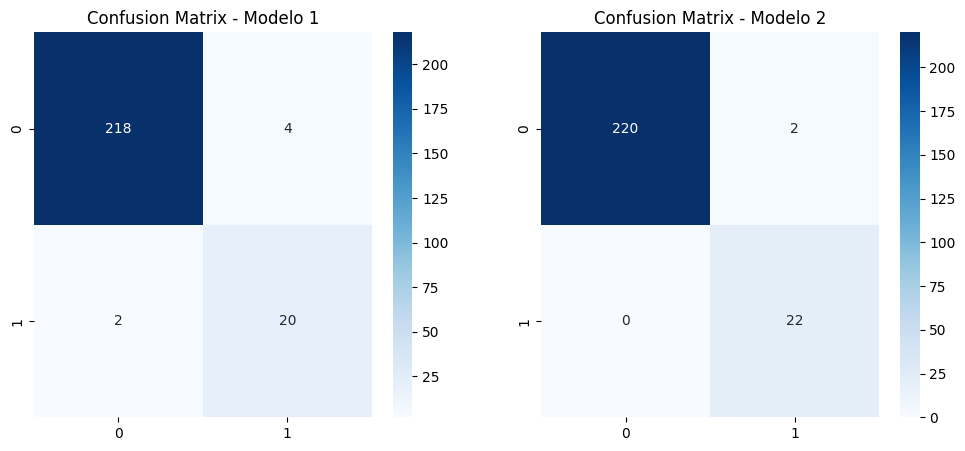

In [15]:
# Matriz de confusión para el primer modelo
cm1 = confusion_matrix(y_test, y_pred)  # Asegúrate de reemplazar y_true y y_pred1 con tus datos reales y predichos

# Matriz de confusión para el segundo modelo
cm2 = confusion_matrix(y_test1, y_pred1)  # Asegúrate de reemplazar y_true y y_pred2 con tus datos reales y predichos

# Crear subplots para comparar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión para el primer modelo
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Modelo 1')

# Matriz de confusión para el segundo modelo
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Modelo 2')

plt.show()

Se llevó a cabo el entrenamiento de un segundo modelo utilizando como predictores los 100 genes con mayor puntaje obtenidos de 'geneScore', los cuales fueron identificados a través del gen 'PIK3R1'.

Accuracy: 99.18%, observándose una mejora significativa en comparación con el primer modelo.

Precision: La precisión para la clase "Primary Tumor" sigue siendo alta (1.00), pero para la clase "Solid Tissue Normal" mejora al 92%.

Recall: El modelo identifica correctamente todos los casos positivos para ambas clases, alcanzando un recall perfecto (1.00) para la clase "Solid Tissue Normal".

F1-score: Se observa una mejora significativamente alta para ambas clases en general, indicando un rendimiento excepcional.

Macro avg y Weighted avg: Permanecen altos, indicando un buen rendimiento general.

En general, ambos modelos tienen un rendimiento muy bueno, pero el segundo modelo es ligeramente superior en términos de accuracy y recall para la clase "Solid Tissue Normal". El segundo modelo parece ser más equilibrado y preciso, con valores más altos en todas las métricas.